In [1]:
import os
import numpy as np
import pickle


os.chdir('../')
from lib.methods import *

fig = Figure({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            })

In [2]:
os.chdir('../')

In [3]:
class MRI8_NVF4_10mm_0p0mmVVVV:
    CSV_FILE_DIR = './data/VF_FVF_DATASETS/CSV/'
    VIDEO_FILE_DIR = './data/VF_FVF_DATASETS/VIDEO/'
    DATA_NAME = 'MRI8_NVF4_10mm_0p0mmVVVV'
    CSV_ADDITIONAL_PATH = ''
    SAMPLE_SPAN = [40000, 140000]
    LINE_SCANNING_PARAMS_VF = {'position':[50, 40],'width': 40}
    LINE_SCANNING_PARAMS_FVF = {'position':[70, 80],'width': 70}
    FILTERING_VIDEO_PARAMS_VF = {'kernel_length':10, 'kernel_size':3}
    FILTERING_VIDEO_PARAMS_FVF = {'kernel_length':10, 'kernel_size':3}
    AUTOENCODER_METHOD = 'MLP'
    AUTOENCODER_PARAMS_VF = { 'hidden_layers_shape': [20],
                            'latent_dim': 1,
                            'latent_regularizer': None,
                            'random_state': 0,
                            'learning_rate': 1e-3,
                            'loss_function': 'mse',
                            'epochs': 300,
                            'batch_size': 1024,
                            'verbose': 0,
                            'callbacks': None }
    AUTOENCODER_PARAMS_FVF = { 'hidden_layers_shape': [35],
                            'latent_dim': 1,
                            'latent_regularizer': None,
                            'random_state': 0,
                            'learning_rate': 1e-3,
                            'loss_function': 'mse',
                            'epochs': 300,
                            'batch_size': 1024,
                            'verbose': 0,
                            'callbacks': None }
    BF_CONVERT_PARAMS = { 'parameter_sample_step': 1000,'standardize': True, 'mean0':False }
    BF_DISCRETIZATION_PARAMS_VF = { 'upside_down': True,'prominence': 1 }
    BF_DISCRETIZATION_PARAMS_FVF = { 'upside_down': False,'prominence': 0.1 }
    SINDY_PARAM_LIM = (55, 90)
    SINDY_TRAIN_N_SAMPLE_VF = 6
    SINDY_TRAIN_PARAMS_LIST_VF = [0, 1, 2, 3, 4, 5,  6,  8, 9, 10, 11,  12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,    26, 27, 28,     30, 31, 32, 33, 34]
    SINDY_PARAMS_VF = {'order':7, 'threshold':0.1, 'alpha':1e-1, }
    SINDY_FREERUN_PARAMS_VF = {'data0':1.5, 'parameter_start_stop_step':(0.75, 1.001, 0.0001), 'n_run':10, 'n_idling_run':10}
    SINDY_TRAIN_N_SAMPLE_FVF = 15
    SINDY_TRAIN_PARAMS_LIST_FVF = [0,   5,   10, 11, 12, 13, 14,   15, 16, 17,   19,   22, 21, 23, 24, 25,   27, 28, 29,    34]
    SINDY_PARAMS_FVF = {'order':7, 'threshold':0.1, 'alpha':1e-1, }
    SINDY_FREERUN_PARAMS_FVF = {'data0':1.0, 'parameter_start_stop_step':(0.75, 1.001, 0.0001), 'n_run':10, 'n_idling_run':10}
    LV_DIR = './results/lv_of_video/'
    SINDY_MODEL_DIR = './results/sindy_model/'

cfg = MRI8_NVF4_10mm_0p0mmVVVV

In [4]:
### LOAD
sindy_vf = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_model_VF.pkl', 'rb'))
bifurcation_data_vf_list_discreted = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_data_VF.pkl', 'rb'))
bifurcation_parameter_vf_list = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_parameter_VF.pkl', 'rb'))

In [26]:
import matplotlib.pylab as plt
from matplotlib import gridspec

class Figure():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]   

    def plt_esn_results(self,
                 data,
                 conversion_param=40., 
                 figsize=(25, 5), width_ratios=[1, 0.5], wspace=0.3,
                 title1=None, title2=None, title3=None,
                 marker1='.', marker2='.',
                 c1='r', c2='r',
                 s1=50, s2=50,
                 xlim1=(None, None), xlim2=(None, None),
                 ylim1=(None, None), ylim2=(None, None),
                 xlabel1=r'$mu $'+'[l/min]', xlabel2=r'$mu $'+'[l/min]',
                 ylabel1=r'$y_l$', ylabel2=r'$y_l$',
                 panel_list = ['(a)', '(b)'], panel_xy_list=[(0.14, 1.), (0.14, 1.)], panel_fontsize=40, 
                save_filename=None,
                 ):
        spec = gridspec.GridSpec(ncols=2, nrows=1,
                                 width_ratios=width_ratios,
                                 wspace=wspace)
        fig = plt.figure(figsize=figsize)

        ax0 = fig.add_subplot(spec[0])
        ax0.set_title(title1, loc='center')
        ax0.scatter(data[:, 1]*conversion_param,data[:, 0], marker=marker1, c=c1, s=s1)
        ax0.tick_params(labelleft=True, left=True, labelbottom=True, bottom=True)
        ax0.set_xlim(xlim1)
        ax0.set_ylim(ylim1)
        ax0.set_xlabel(xlabel1)
        ax0.set_ylabel(ylabel1)
        fig.text(ax0.get_position().x1-panel_xy_list[0][0], ax0.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax2 = fig.add_subplot(spec[1])
        ax2.set_title(title2, loc='center')
        ax2.scatter(data[:, 1]*conversion_param, data[:, 0], marker=marker2, c=c2, s=s2)
        ax2.tick_params(labelleft=True, left=True, labelbottom=True, bottom=True)
        ax2.set_xlim(xlim2)
        ax2.set_ylim(ylim2)
        ax2.set_xlabel(xlabel2)
        ax2.set_ylabel(ylabel2)
        fig.text(ax2.get_position().x1-panel_xy_list[1][0], ax2.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_filename==None:
            plt.show()
        else:
            plt.savefig(save_filename, bbox_inches="tight")

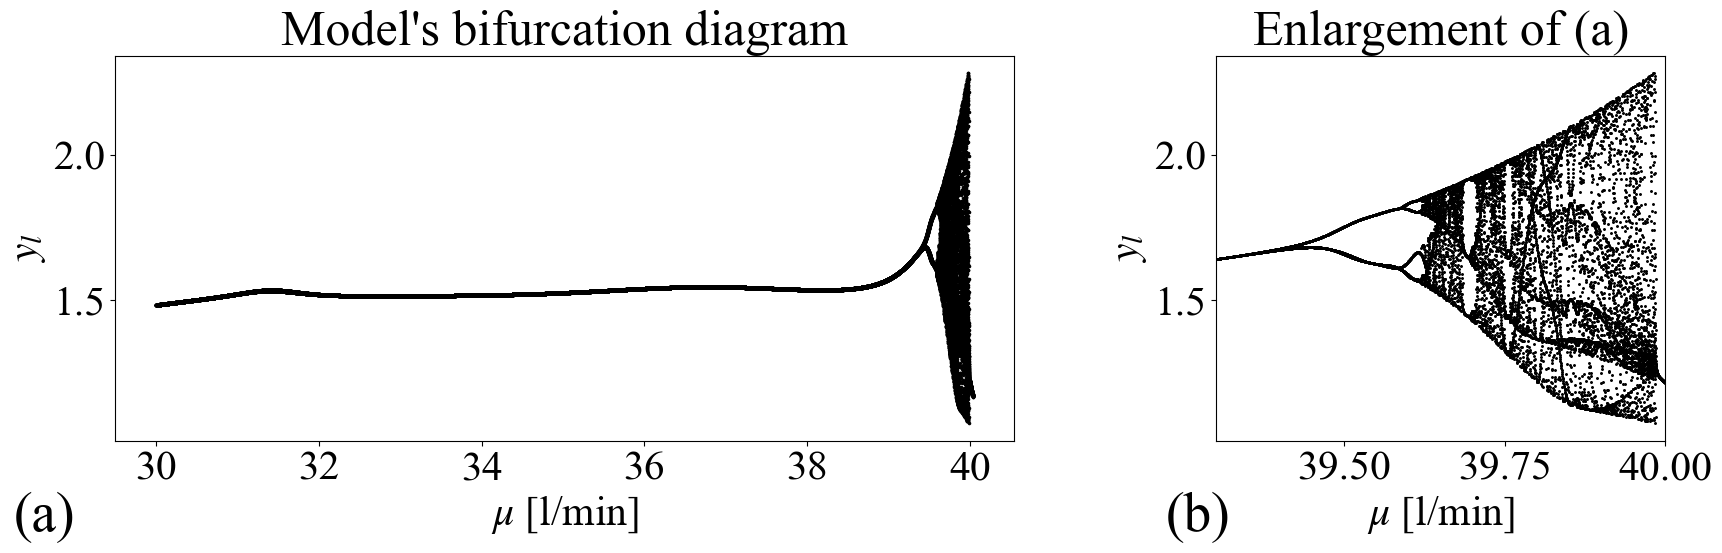

In [40]:
fig = Figure({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            })

fig.plt_esn_results(
                 sindy_vf.freerun_test_X,
                 conversion_param=40., 
                 figsize=(20, 5), width_ratios=[1, 0.5], wspace=0.3,
                 title1="Model's bifurcation diagram", title2='Enlargement of (a)', title3=None,
                 marker1='.', marker2='.',
                 c1='k', c2='k',
                 s1=10, s2=5,
                 xlim1=(None, None), xlim2=(39.3, 40),
                 ylim1=(None, None), ylim2=(None, None),
                 xlabel1=r'$\mu $'+' [l/min]', xlabel2=r'$\mu $'+' [l/min]',
                 ylabel1=r'$y_l$', ylabel2=r'$y_l$',
                 panel_list = ['(a)', '(b)'], panel_xy_list=[(0.5, 0.95), (0.25, 0.95)], panel_fontsize=40, 
                save_filename=None)

In [41]:
### LOAD
sindy_fvf = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_model_FVF.pkl', 'rb'))
bifurcation_data_fvf_list_discreted = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_data_FVF.pkl', 'rb'))
bifurcation_parameter_fvf_list = pickle.load(open(cfg.SINDY_MODEL_DIR+cfg.DATA_NAME+'_parameter_FVF.pkl', 'rb'))

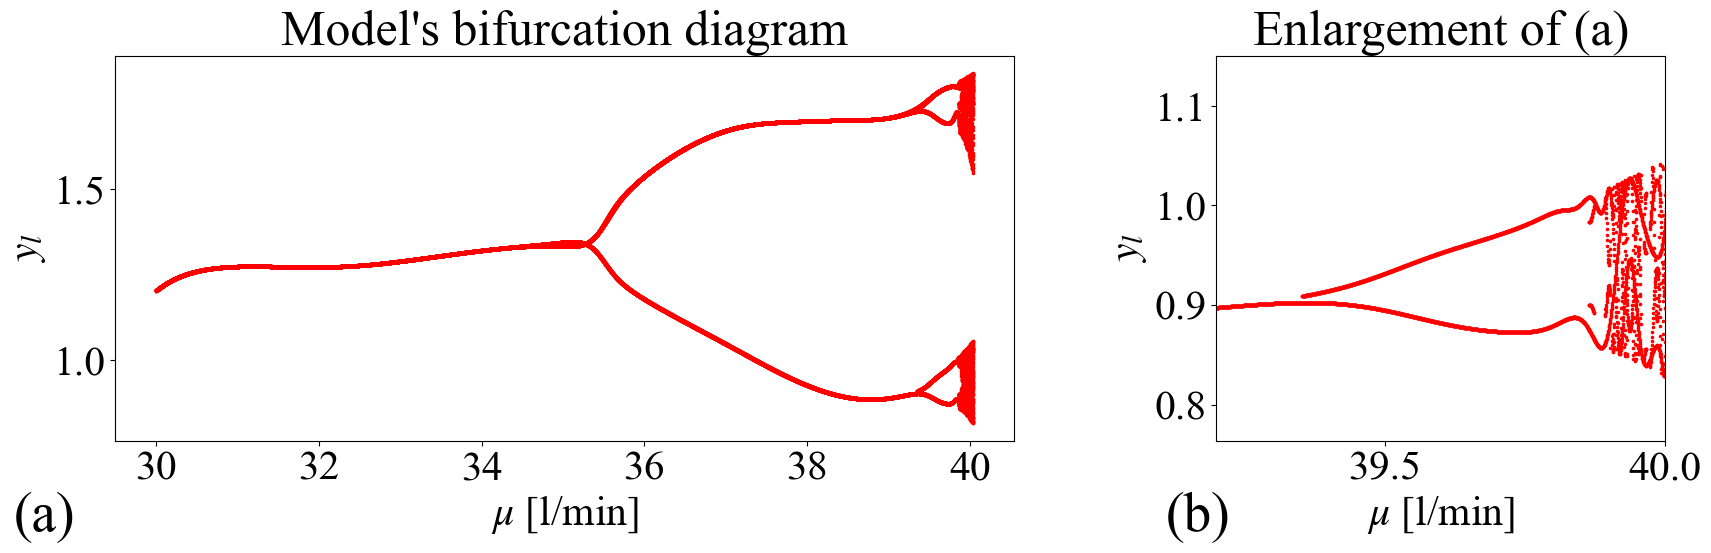

In [52]:
fig.plt_esn_results(
                 sindy_fvf.freerun_test_X,
                 conversion_param=40., 
                 figsize=(20, 5), width_ratios=[1, 0.5], wspace=0.3,
                 title1="Model's bifurcation diagram", title2='Enlargement of (a)', title3=None,
                 marker1='.', marker2='.',
                 c1='r', c2='r',
                 s1=10, s2=10,
                 xlim1=(None, None), xlim2=(39.2, 40),
                 ylim1=(None, None), ylim2=(None, 1.15),
                 xlabel1=r'$\mu $'+' [l/min]', xlabel2=r'$\mu $'+' [l/min]',
                 ylabel1=r'$y_l$', ylabel2=r'$y_l$',
                 panel_list = ['(a)', '(b)'], panel_xy_list=[(0.5, 0.95), (0.25, 0.95)], panel_fontsize=40, 
                save_filename=None)